# How the Random Forest Algorithm Works
The following are the basic steps involved in performing the random forest algorithm:

1. Pick N random records from the dataset.

2. Build a decision tree based on these N records.

3. Choose the number of trees you want in your algorithm and repeat steps 1 and 2.

4. In case of a regression problem, for a new record, each tree in the forest predicts a value for Y (output). The final value can be calculated by taking the average of all the values predicted by all the trees in forest. Or, in case of a classification problem, each tree in the forest predicts the category to which the new record belongs. Finally, the new record is assigned to the category that wins the majority vote.

# Advantages of using Random Forest
As with any algorithm, there are advantages and disadvantages to using it. In the next two sections we'll take a look at the pros and cons of using random forest for classification and regression.

1. The random forest algorithm is not biased, since, there are multiple trees and each tree is trained on a subset of data. Basically, the random forest algorithm relies on the power of "the crowd"; therefore the overall biasedness of the algorithm is reduced.

2. This algorithm is very stable. Even if a new data point is introduced in the dataset the overall algorithm is not affected much since new data may impact one tree, but it is very hard for it to impact all the trees.

3. The random forest algorithm works well when you have both categorical and numerical features.

4. The random forest algorithm also works well when data has missing values or it has not been scaled well (although we have performed feature scaling in this article just for the purpose of demonstration).

# Disadvantages of using Random Forest
1. A major disadvantage of random forests lies in their complexity. They required much more computational resources, owing to the large number of decision trees joined together.

2. Due to their complexity, they require much more time to train than other comparable algorithms.

Throughout the rest of this article we will see how Python's Scikit-Learn library can be used to implement the random forest algorithm to solve regression, as well as classification, problems.

# 1. Data Load

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

base_path = '/content/drive/MyDrive/Colab Notebooks/DScourse/week9/'

In [ ]:
data = pd.read_csv(base_path + 'petrol_consumption.csv')
data

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
5,10.00,5342,1333,0.571,457
6,8.00,5319,11868,0.451,344
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


# 2. Data Preparing

Two tasks will be performed in this section. The first task is to divide data into 'attributes' and 'label' sets. The resultant data is then divided into training and test sets.

The following script divides data into attributes and labels:

In [ ]:
X = data.iloc[:, 0:4].values
y = data.iloc[:, 4].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## 3. Feature Scaling
We know our dataset is not yet a scaled value, for instance the Average_Income field has values in the range of thousands while Petrol_tax has values in range of tens. Therefore, it would be beneficial to scale our data (although, as mentioned earlier, this step isn't as important for the random forests algorithm). To do so, we will use Scikit-Learn's StandardScaler class. Execute the following code to do so:

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train) # Fit and Transform
X_test = sc.transform(X_test)       # Transform with mean & standard deviation of train data

In [ ]:
print(sc.var_)
print(sc.scale_)

[1.01756011e+00 2.88278460e+05 1.37661001e+07 3.18185665e-03]
[1.00874185e+00 5.36915692e+02 3.71026955e+03 5.64079484e-02]


## 4. Training the Algorithm
Now that we have scaled our dataset, it is time to train our random forest algorithm to solve this regression problem.

Execute the following code:

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
X_test

array([[ 1.35447518, -1.33452296, -0.31161731, -1.48308699],
       [ 0.36314126,  0.15174391, -1.44873146, -0.57895909],
       [ 0.36314126, -1.6194839 , -0.10974518, -0.5080471 ],
       [-0.62819265, -1.26188585,  0.29615525, -1.03988704],
       [ 0.36314126, -2.33654247,  0.19346729,  0.02379284],
       [-0.62819265, -0.78322597,  0.1560037 ,  0.16561682],
       [ 0.36314126, -1.47048471, -0.62291545, -1.58945498],
       [-0.62819265,  0.2448684 , -0.31458205,  0.87473675],
       [ 0.36314126,  1.50577399, -0.98865707, -0.41940711],
       [ 0.36314126,  0.13684399,  0.0357968 , -0.82715107]])

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 51.76500000000001
Mean Squared Error: 4216.166749999999
Root Mean Squared Error: 64.93201637097064


In [ ]:
def rmse_evaluation(n_estimators):
    regressor = RandomForestRegressor(n_estimators=n_estimators, random_state=0)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

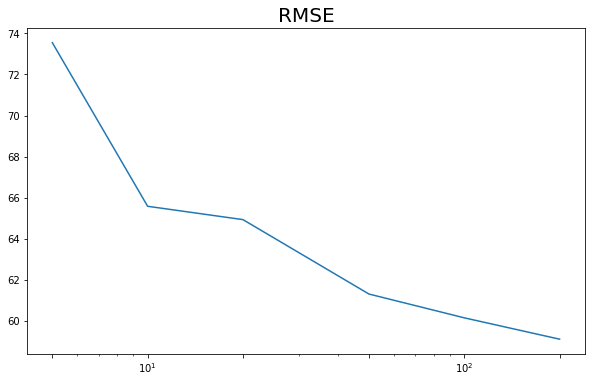

In [ ]:
n = [5, 10, 20, 50, 100, 200]
rmse = []
for num in n:
    rmse.append(rmse_evaluation(num))

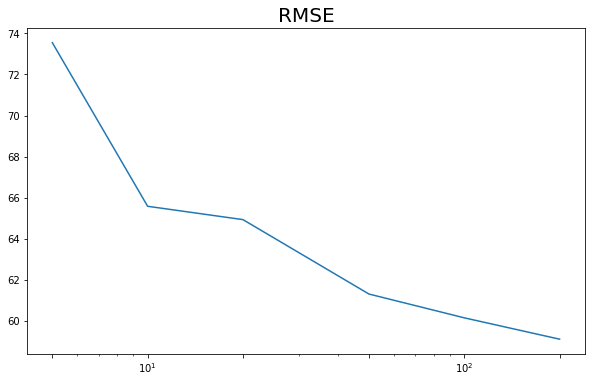

In [29]:
import matplotlib

fig = plt.figure(figsize=(10, 6))
plt.plot(n, rmse)
plt.title('RMSE', fontsize=20)
plt.xscale('log')
plt.xticks(n)
# ax.set_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.show()